# Simulation of chirp compression

July 3, 2018

Reference: 
- [Sound Synthesis with Numpy](https://dzone.com/articles/sound-synthesis-numpy)
- [Radar Pulse Compression](https://www.ittc.ku.edu/workshops/Summer2004Lectures/Radar_Pulse_Compression.pdf)

In [146]:
%matplotlib inline
%run ./chirp.py

## Up chirp

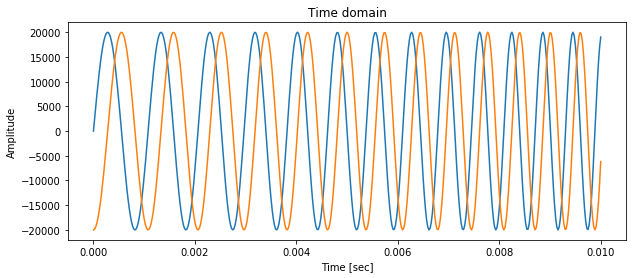

In [147]:
# Upchirp by complex exponential function
plot_wave(chirp(T=0.01), real_only=False)

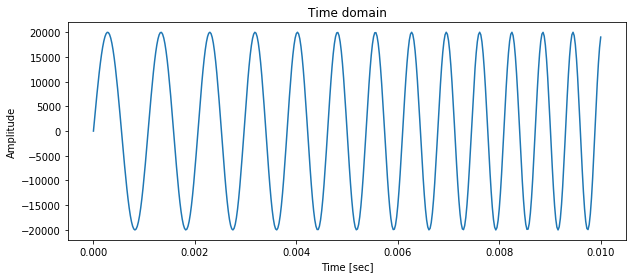

In [148]:
# Upchirp by cosine function
plot_wave(chirp_cos(T=0.01), real_only=True)

In [150]:
play(chirp())

Frequencies at peaks: [ 906. 1734.] Hz


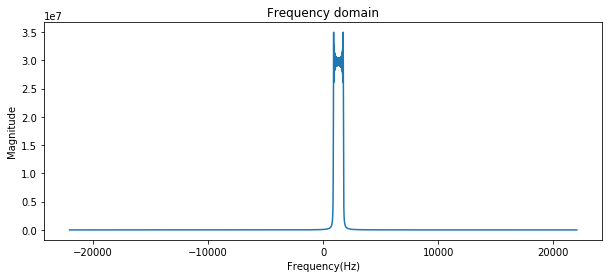

In [151]:
plot_fft(chirp())

Frequencies at peaks: [-1734.  -906.   906.  1734.] Hz


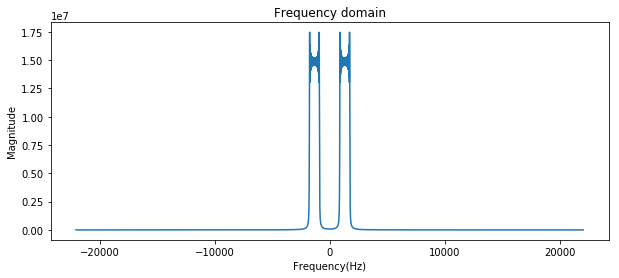

In [152]:
plot_fft(chirp_cos())

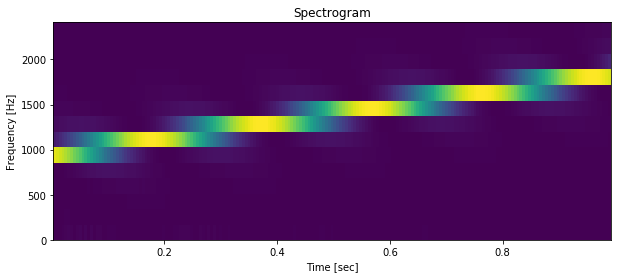

In [153]:
plot_spectrogram(chirp_cos(), nperseg=256, band=15)

## Up chirp * up chirp

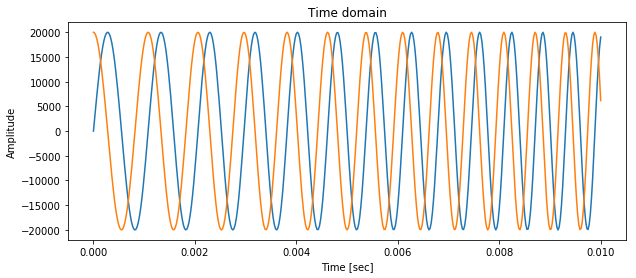

In [154]:
# Up chirp conjugate
plot_wave(chirp(T=0.01).conjugate(), real_only=False)

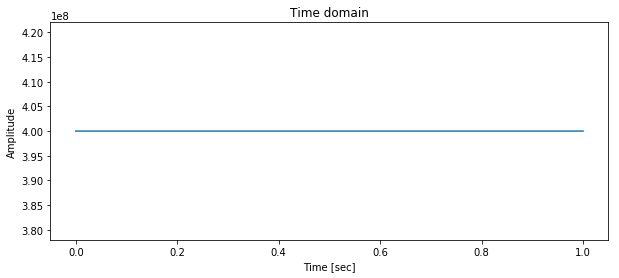

In [155]:
# Up chirp * up chirp conjugate becomes DC
plot_wave(chirp() * chirp().conjugate())

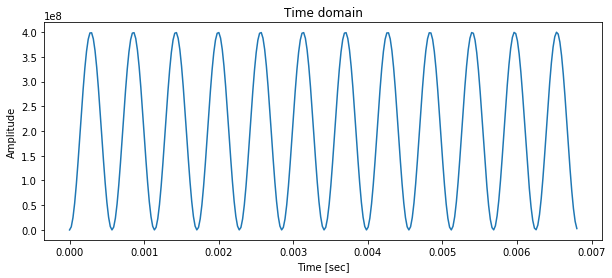

In [156]:
# Up chirp * up chirp becomes chirp with doubled frequency and DC offset
plot_wave((chirp_cos() * chirp_cos())[0:300])

Frequencies at peaks: [0.] Hz


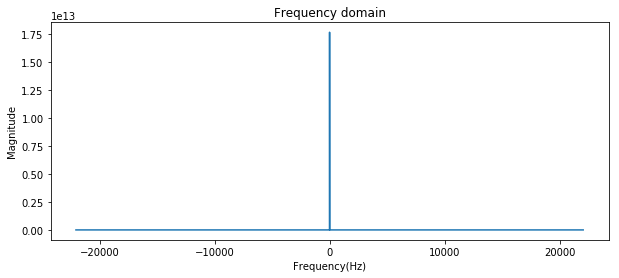

In [157]:
plot_fft(chirp() * chirp().conjugate())

Frequencies at peaks: [0.] Hz


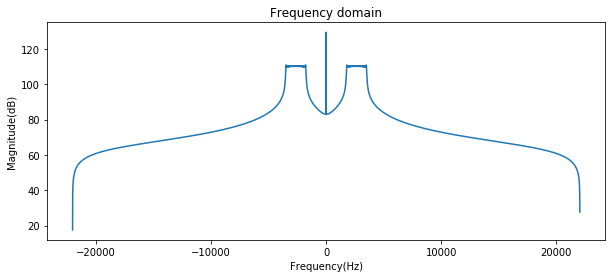

In [158]:
# Chirp squared term
plot_fft(chirp_cos() * chirp_cos(), logscale=True)

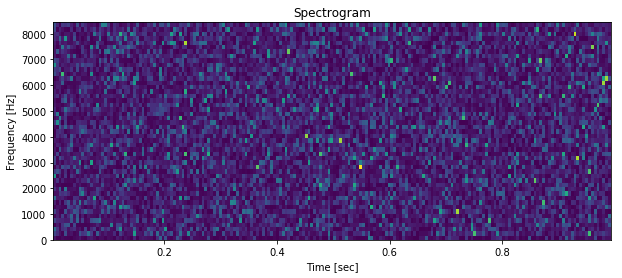

In [159]:
plot_spectrogram(chirp() * chirp().conjugate(), nperseg=256, band=50)

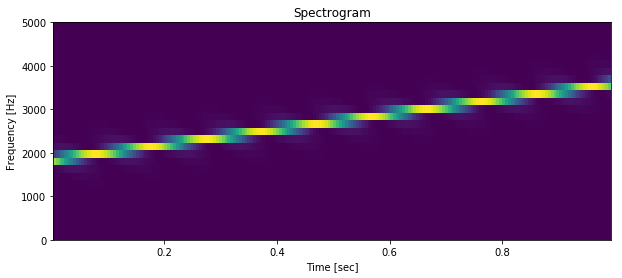

In [160]:
# Chirp squared term
plot_spectrogram(chirp_cos() * chirp_cos(), nperseg=256, band=30)

## Up chirp * Down chirp

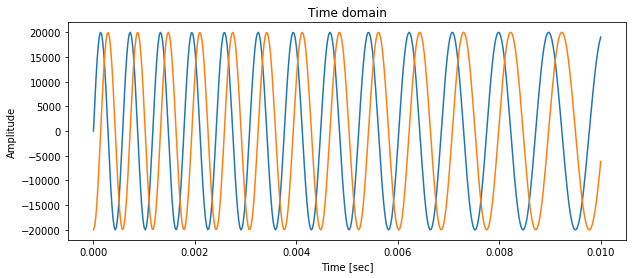

In [161]:
plot_wave(chirp(T=0.01, updown="down"), real_only=False)

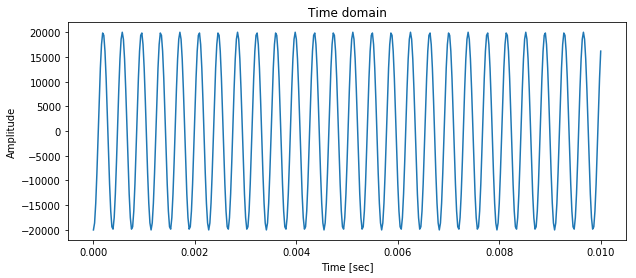

In [162]:
plot_wave(chirp(T=0.01, amp=sqrt(AMPLITUDE)) * chirp(T=0.01, amp=sqrt(AMPLITUDE), updown="down"))

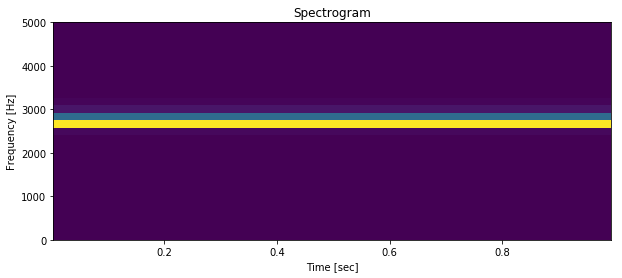

In [163]:
plot_spectrogram(chirp(amp=sqrt(AMPLITUDE)) * chirp(amp=sqrt(AMPLITUDE), updown="down"), nperseg=256, band=30)
play(chirp(amp=sqrt(AMPLITUDE)) * chirp(amp=sqrt(AMPLITUDE), updown="down"))

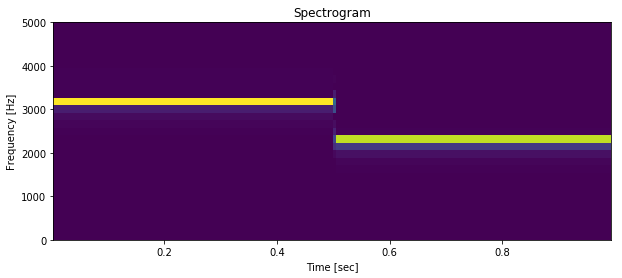

In [164]:
# Unsynchronized upchirp * downchirp
upchirp=chirp(amp=sqrt(AMPLITUDE))
plot_spectrogram(append(upchirp[22000:], upchirp[:22000]) * chirp(amp=sqrt(AMPLITUDE), updown="down"), nperseg=256, band=30)
play(append(upchirp[22000:], upchirp[:22000]) * chirp(amp=sqrt(AMPLITUDE), updown="down"))

Frequencies at peaks: [2640.] Hz


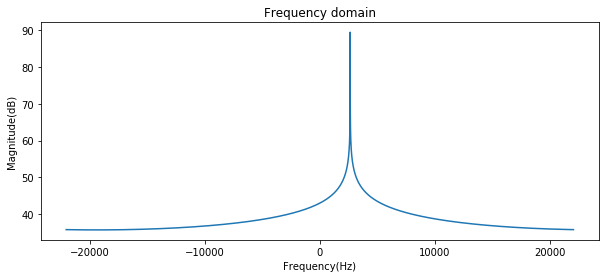

In [165]:
plot_fft(chirp(amp=sqrt(AMPLITUDE)) * chirp(amp=sqrt(AMPLITUDE), updown="down"), logscale=True)

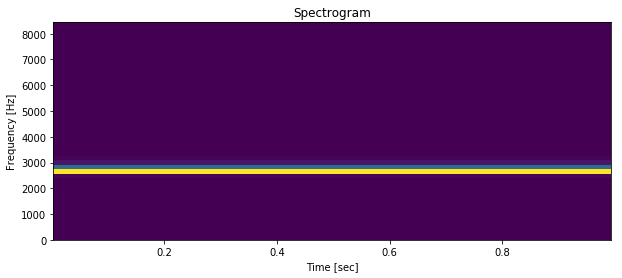

In [166]:
plot_spectrogram(chirp(amp=sqrt(AMPLITUDE)) * chirp(amp=sqrt(AMPLITUDE), updown="down"), nperseg=256, band=50)

## Radar system

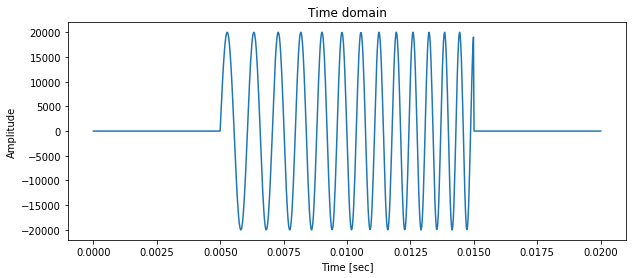

In [167]:
# Upchirp by cosine function (delay = chirp length in time * 0.5)
plot_wave(add_delay(chirp_cos(T=0.01), 0.5))

Frequencies at peaks: [0.] Hz


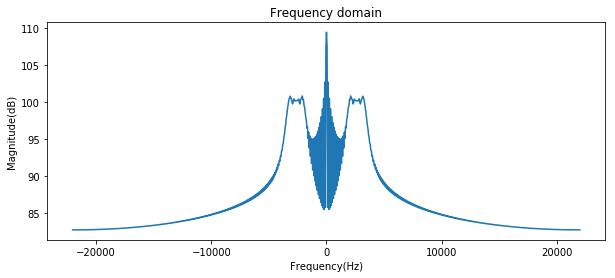

In [168]:
plot_fft(add_delay(chirp_cos(T=0.01), 0.0) * chirp_cos(f0=F0, f1=F0+(F1-F0)*2, T=0.02), logscale=True)

Frequencies at peaks: [-450.  450.] Hz


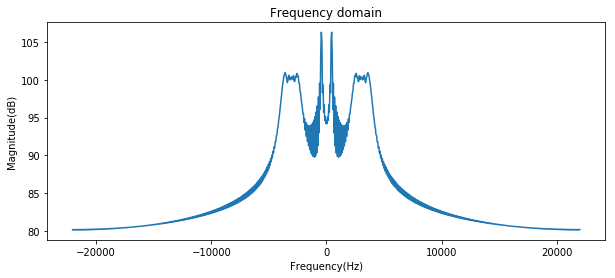

In [169]:
plot_fft(add_delay(chirp_cos(T=0.01), 0.5) * chirp_cos(f0=F0, f1=F0+(F1-F0)*2, T=0.02), logscale=True)

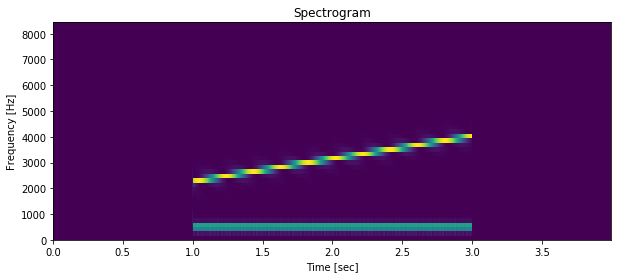

In [170]:
plot_spectrogram(add_delay(chirp_cos(T=2.0), 0.5) * chirp_cos(f0=F0, f1=F0+(F1-F0)*2, T=4.0), nperseg=256, band=50)

Frequencies at peaks: [-792. -440.  -88.   88.  440.  792.] Hz


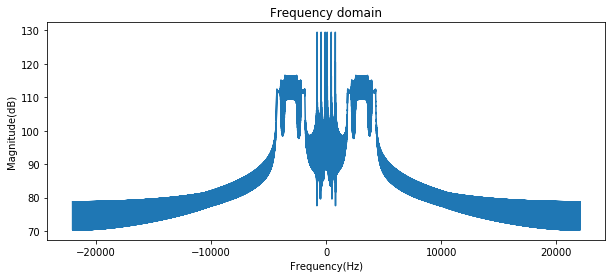

In [171]:
echo0 = add_delay(chirp_cos(T=2.0), 0.1)
echo1 = add_delay(chirp_cos(T=2.0), 0.5)
echo2 = add_delay(chirp_cos(T=2.0), 0.9)
echos = echo0 + echo1 + echo2
plot_fft(echos * chirp_cos(f0=F0, f1=F0+(F1-F0)*2, T=4.0), logscale=True)

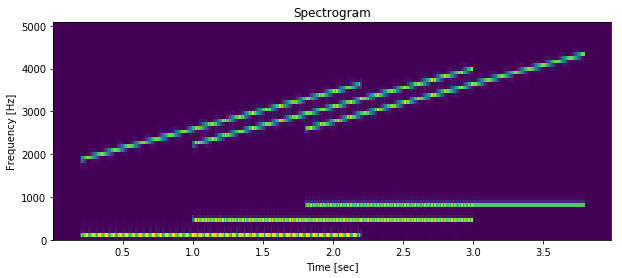

In [172]:
plot_spectrogram(echos * chirp_cos(f0=F0, f1=F0+(F1-F0)*2, T=4.0), nperseg=512, band=60)

## Compress chirp in frequency domain (chirp signal under noise level)

### Complex chirp signal

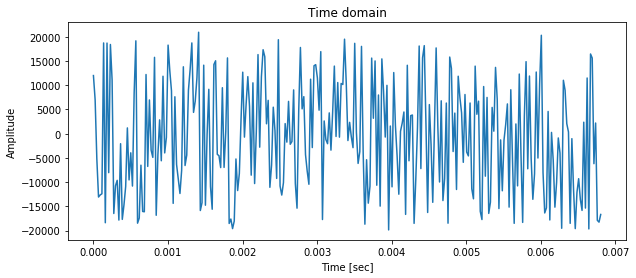

In [173]:
# Chirp signal under noise level (amplitude = 1000, noise amplitude = 20000)
plot_wave((chirp(amp=1000) + white_noise())[0:300], real_only=True)

Frequencies at peaks: [3520.] Hz


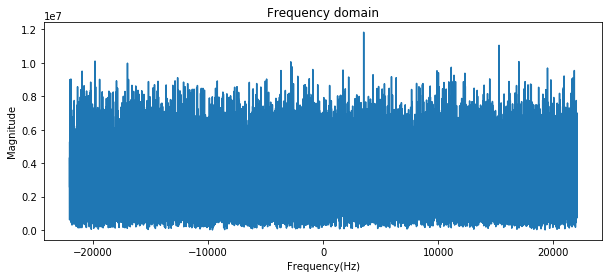

In [174]:
plot_fft((chirp(amp=1000) + white_noise()))

Frequencies at peaks: [0.] Hz


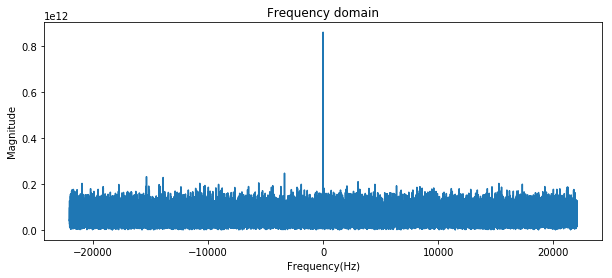

In [175]:
plot_fft((chirp(amp=1000) + white_noise()) * chirp().conjugate())

# Compress chirp in time domain

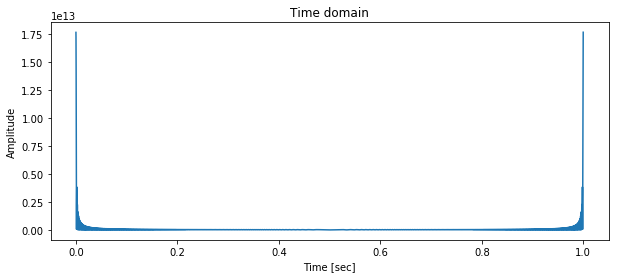

In [176]:
# Here, I use IFFT and FFT rather than filter functions
plot_wave(abs(ifft(fft(chirp()) * fft(chirp(updown="down")))))

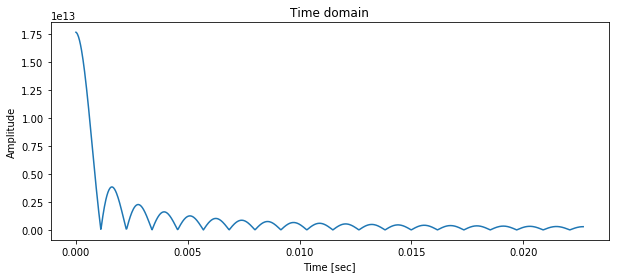

In [177]:
plot_wave(abs(ifft(fft(chirp()) * fft(chirp(updown="down"))))[0:1000])

## Compress unsynchronized chirp under noise level in time domain

In [178]:
noise = white_noise()
chirp = chirp_cos(amp=2000)  # Synchronized time frame
chirp1 = append(chirp[4000:], chirp[:4000])  # Unsynchronized time frame 1
chirp2 = append(chirp[8000:], chirp[:8000])  # Unsynchronized time frame 2
down_chirp = chirp_cos(amp=2000, updown="down")  # Matched filter for chirp compression

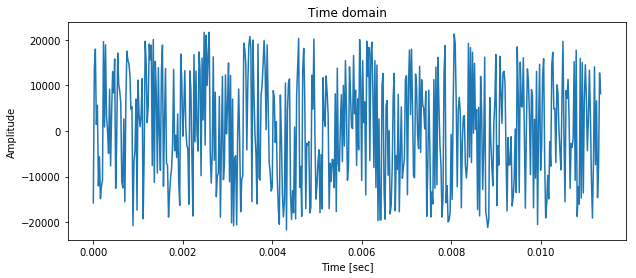

In [179]:
plot_wave((chirp + noise)[0:500])

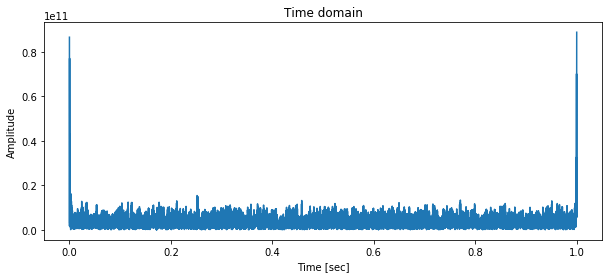

In [180]:
plot_wave(abs(ifft(fft(chirp + noise) * fft(down_chirp))))

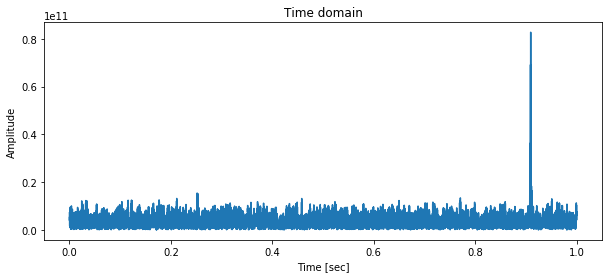

In [181]:
plot_wave(abs(ifft(fft(chirp1 + noise) * fft(down_chirp))))

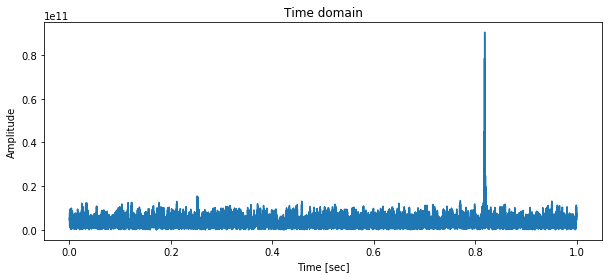

In [182]:
plot_wave(abs(ifft(fft(chirp2 + noise) * fft(down_chirp))))